# Numerical Exercise 11

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras import activations

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']


2024-06-20 12:22:55.153530: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

# RESTART THE KERNEL EACH TIME YOU RUN THIS NOTEBOOK
and be sure to have enough memory available if running with CUDA. 


## Resolution
I have chosen a large amount of data to train the model, in order to have a good fit. The model is a 3 layer neural network with 40 neurons in the first layer, 20 in the second and 1 in the output layer.
I have chosen three activation functions to evaluate the performance of the model: sigmoid, tanh and relu.
However, in order to use relu and sigmoid the last layer must have weights that could be negative, so I have used both linear and tanh activation functions in the last layer.
The model is trained with the Nadam optimizer and the mean squared error loss function.


In [2]:
N_epochs = 60
N_train = 10000 # <<< train
N_valid = 1000 # <<< test
sigma = 0.3

def f(x, y):
    return np.sin((x ** 2 + y ** 2))

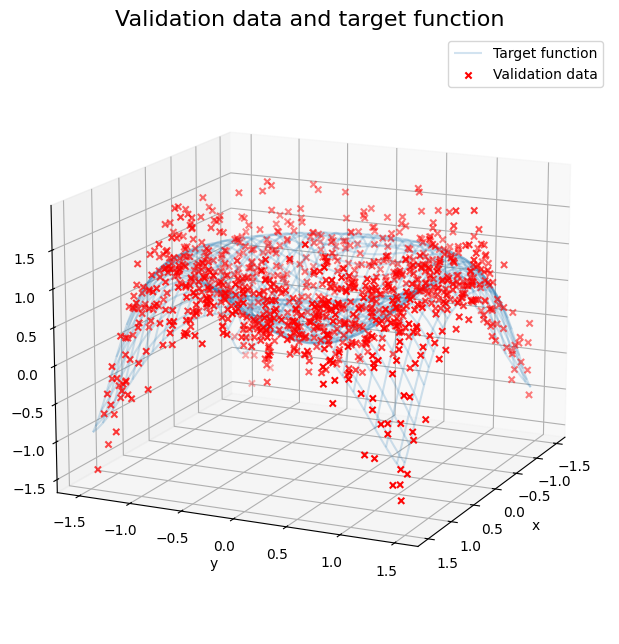

In [3]:
x_train = np.random.uniform(-3./2., 3./2., N_train)
x_valid = np.random.uniform(-3./2., 3./2., N_valid)

y_train = np.random.uniform(-3./2., 3./2., N_train)
y_valid = np.random.uniform(-3./2., 3./2., N_valid)

pair_train = np.column_stack((x_train,y_train))
pair_valid = np.column_stack((x_valid,y_valid))

z_target = f(x_valid, y_valid)
z_train = np.random.normal(f(x_train,y_train), sigma)
z_valid = np.random.normal(f(x_valid,y_valid), sigma)

fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig)
fig.add_axes(ax)

x_surf = np.arange(-3./2., 3./2., 0.05)
y_surf = np.arange(-3./2., 3./2., 0.05)
X_surf, Y_surf = np.meshgrid(x_surf,y_surf)
ax.plot_wireframe(X_surf, Y_surf, f(X_surf, Y_surf), label = "Target function", alpha = 0.2)
ax.scatter(x_valid, y_valid, z_valid, marker = "x", color = "r", label = "Validation data")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Validation data and target function", fontsize = 16)
ax.legend()
ax.view_init(15, 25)

plt.show()

In [4]:
act = ['tanh', 'relu', 'sigmoid']


In [5]:
# only tanh
modeltanh = tf.keras.Sequential()
modeltanh.add(Dense(40, input_shape = (2,), activation = 'tanh'))
modeltanh.add(Dense(20, activation = 'tanh'))
modeltanh.add(Dense(1, activation = 'tanh'))
modeltanh.compile(optimizer = 'nadam', loss = 'mse', metrics = ['mse'])
modeltanh.fit(x = pair_train, y = z_train, batch_size = 32, epochs = N_epochs, shuffle = True, validation_data = (pair_valid, z_valid))
historytanh = modeltanh.fit(x = pair_train, y = z_train, batch_size = 32, epochs = N_epochs, shuffle = True, validation_data = (pair_valid, z_valid))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-20 12:22:56.817591: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-20 12:22:56.824458: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355

Epoch 1/60


I0000 00:00:1718886178.067097  352027 service.cc:145] XLA service 0x7f0b94003890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1718886178.067120  352027 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 with Max-Q Design, Compute Capability 7.5
2024-06-20 12:22:58.113989: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-20 12:22:58.182933: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


147/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4168 - mse: 0.4168

I0000 00:00:1718886178.746671  352027 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3479 - mse: 0.3479 - val_loss: 0.2573 - val_mse: 0.2544
Epoch 2/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.2409 - mse: 0.2409 - val_loss: 0.2586 - val_mse: 0.2556
Epoch 3/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2439 - mse: 0.2439 - val_loss: 0.2586 - val_mse: 0.2561
Epoch 4/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2476 - mse: 0.2476 - val_loss: 0.2575 - val_mse: 0.2549
Epoch 5/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2499 - mse: 0.2499 - val_loss: 0.2586 - val_mse: 0.2558
Epoch 6/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2482 - mse: 0.2482 - val_loss: 0.2552 - val_mse: 0.2522
Epoch 7/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2467 - mse: 0.2467 - val_loss: 0.2596 - val_mse: 0.2565
Epoch 8/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2410 - mse: 0.2410 - val_loss: 0.2538 - val_mse: 0.2509
Epoch 9/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.243

In [16]:
# only tanh
modeltanh_lin = tf.keras.Sequential()
modeltanh_lin.add(Dense(40, input_shape = (2,), activation = 'tanh'))
modeltanh_lin.add(Dense(20, activation = 'tanh'))
modeltanh_lin.add(Dense(1, activation = 'tanh'))
modeltanh_lin.compile(optimizer = 'nadam', loss = 'mse', metrics = ['mse'])
modeltanh_lin.fit(x = pair_train, y = z_train, batch_size = 32, epochs = N_epochs, shuffle = True, validation_data = (pair_valid, z_valid))
historytanh_lin = modeltanh_lin.fit(x = pair_train, y = z_train, batch_size = 32, epochs = N_epochs, shuffle = True, validation_data = (pair_valid, z_valid))

Epoch 1/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3360 - mse: 0.3360 - val_loss: 0.2572 - val_mse: 0.2543
Epoch 2/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2480 - mse: 0.2480 - val_loss: 0.2604 - val_mse: 0.2577
Epoch 3/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2465 - mse: 0.2465 - val_loss: 0.2628 - val_mse: 0.2593
Epoch 4/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2453 - mse: 0.2453 - val_loss: 0.2553 - val_mse: 0.2522
Epoch 5/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2466 - mse: 0.2466 - val_loss: 0.2554 - val_mse: 0.2525
Epoch 6/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2457 - mse: 0.2457 - val_loss: 0.2555 - val_mse: 0.2523
Epoch 7/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2402 - mse: 0.2402 - val_loss: 0.2555 - val_mse: 0.2522
Epoch 8/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2395 - mse: 0.2395 - val_loss: 0.2552 - val_mse: 0.2519
Epoch 9/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2366 

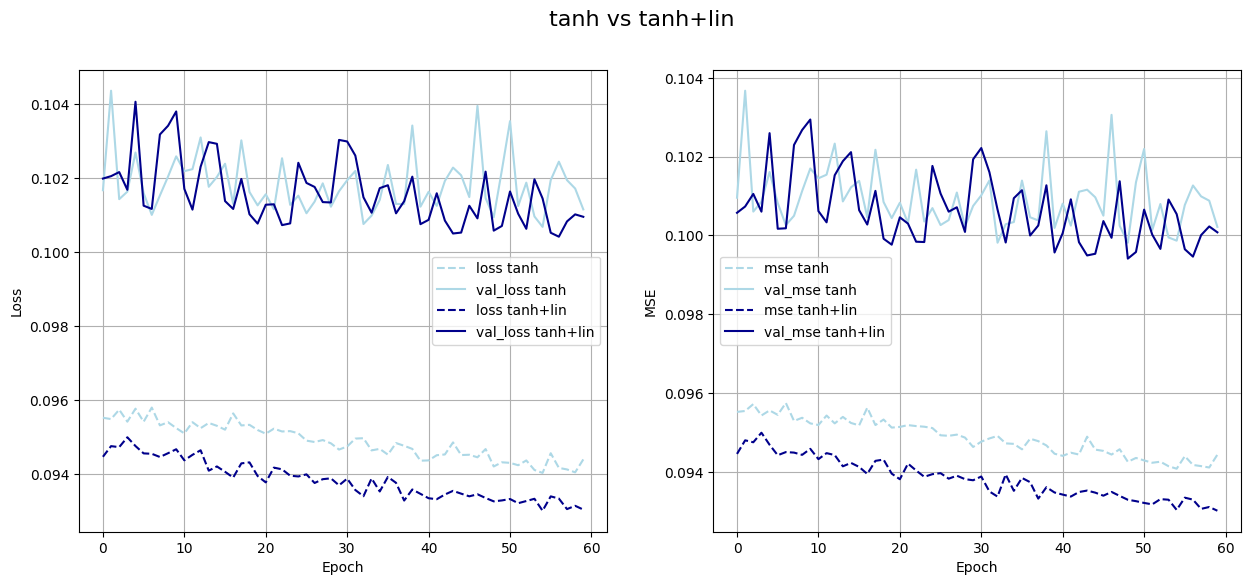

In [17]:
# plot results tanh
fig = plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.plot(historytanh.history['loss'], label = 'loss tanh', color = 'lightblue', linestyle = '--')
plt.plot(historytanh.history['val_loss'], label = 'val_loss tanh', color = 'lightblue')
plt.plot(historytanh_lin.history['loss'], label = 'loss tanh+lin', color = 'darkblue', linestyle = '--')
plt.plot(historytanh_lin.history['val_loss'], label = 'val_loss tanh+lin', color = 'darkblue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(historytanh.history['mse'], label = 'mse tanh', color = 'lightblue', linestyle = '--')
plt.plot(historytanh.history['val_mse'], label = 'val_mse tanh', color = 'lightblue')
plt.plot(historytanh_lin.history['mse'], label = 'mse tanh+lin', color = 'darkblue', linestyle = '--')
plt.plot(historytanh_lin.history['val_mse'], label = 'val_mse tanh+lin', color = 'darkblue')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

plt.suptitle('tanh vs tanh+lin', fontsize = 16)
plt.show()

In [ ]:
#relu + linear
modelrelu = tf.keras.Sequential()
modelrelu.add(Dense(40, input_shape = (2,), activation = 'relu'))
modelrelu.add(Dense(20, activation = 'relu'))
modelrelu.add(Dense(1, activation = 'linear'))
modelrelu.compile(optimizer = 'nadam', loss = 'mse', metrics = ['mse'])
modelrelu.fit(x = pair_train, y = z_train, batch_size = 32, epochs = N_epochs, shuffle = True, validation_data = (pair_valid, z_valid))
historyrelu = modelrelu.fit(x = pair_train, y = z_train, batch_size = 32, epochs = N_epochs, shuffle = True, validation_data = (pair_valid, z_valid))


Epoch 1/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3350 - mse: 0.3350 - val_loss: 0.2252 - val_mse: 0.2243
Epoch 2/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.2019 - mse: 0.2019 - val_loss: 0.1793 - val_mse: 0.1788
Epoch 3/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 0.1616 - mse: 0.1616 - val_loss: 0.1444 - val_mse: 0.1442
Epoch 4/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.1295 - mse: 0.1295 - val_loss: 0.1221 - val_mse: 0.1217
Epoch 5/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 0.1138 - mse: 0.1138 - val_loss: 0.1104 - val_mse: 0.1098
Epoch 6/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.1043 - mse: 0.1043 - val_loss: 0.1101 - val_mse: 0.1098
Epoch 7/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 0.1009 - mse: 0.1009 - val_loss: 0.1044 - val_mse: 0.1042
Epoch 8/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 0.0979 - mse: 0.0979 - val_loss: 0.1007 - val_mse: 0.1000
Epoch 9/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s

In [7]:
#relu +tanh
modelrelu_tan = tf.keras.Sequential()
modelrelu_tan.add(Dense(40, input_shape = (2,), activation = 'relu'))
modelrelu_tan.add(Dense(20, activation = 'relu'))
modelrelu_tan.add(Dense(1, activation = 'tanh'))
modelrelu_tan.compile(optimizer = 'nadam', loss = 'mse', metrics = ['mse'])
modelrelu_tan.fit(x = pair_train, y = z_train, batch_size = 32, epochs = N_epochs, shuffle = True, validation_data = (pair_valid, z_valid))
historyrelu_tan = modelrelu_tan.fit(x = pair_train, y = z_train, batch_size = 32, epochs = N_epochs, shuffle = True, validation_data = (pair_valid, z_valid))


Epoch 1/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3417 - mse: 0.3417 - val_loss: 0.2411 - val_mse: 0.2400
Epoch 2/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2246 - mse: 0.2246 - val_loss: 0.2142 - val_mse: 0.2125
Epoch 3/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.1959 - mse: 0.1959 - val_loss: 0.1808 - val_mse: 0.1785
Epoch 4/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.1603 - mse: 0.1603 - val_loss: 0.1421 - val_mse: 0.1398
Epoch 5/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 0.1353 - mse: 0.1353 - val_loss: 0.1242 - val_mse: 0.1221
Epoch 6/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 0.1150 - mse: 0.1150 - val_loss: 0.1143 - val_mse: 0.1123
Epoch 7/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 0.1092 - mse: 0.1092 - val_loss: 0.1092 - val_mse: 0.1071
Epoch 8/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 0.1030 - mse: 0.1030 - val_loss: 0.1074 - val_mse: 0.1055
Epoch 9/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9

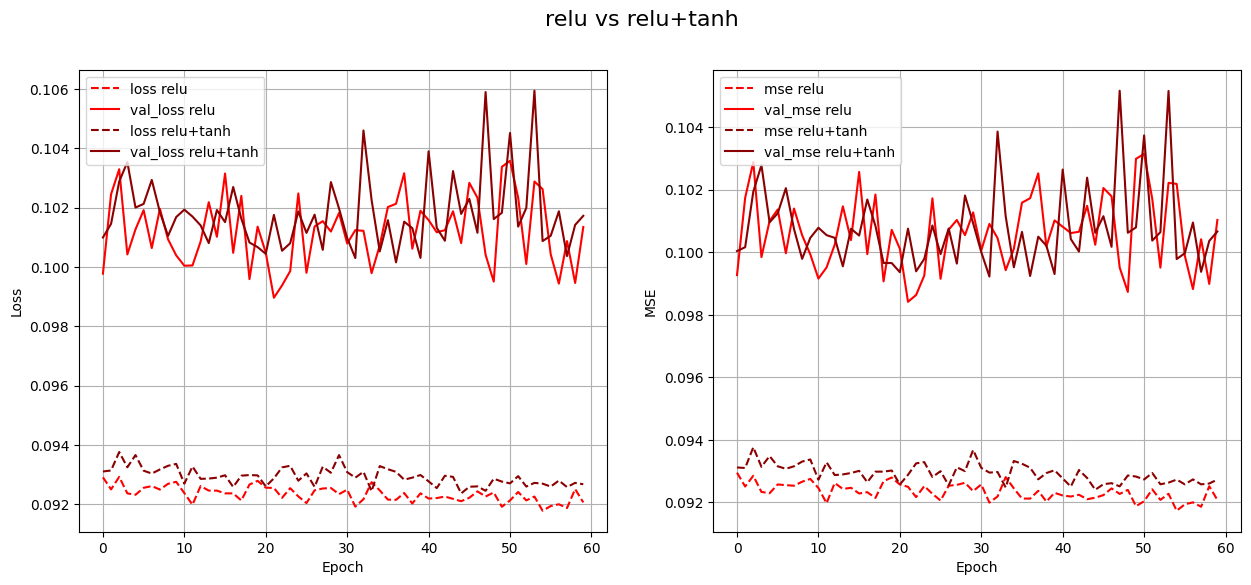

In [10]:
# plot results relu
fig = plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.plot(historyrelu.history['loss'], label = 'loss relu', color = 'red', linestyle = '--')
plt.plot(historyrelu.history['val_loss'], label = 'val_loss relu', color = 'red')
plt.plot(historyrelu_tan.history['loss'], label = 'loss relu+tanh', color = 'darkred', linestyle = '--')
plt.plot(historyrelu_tan.history['val_loss'], label = 'val_loss relu+tanh', color = 'darkred')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(historyrelu.history['mse'], label = 'mse relu', color = 'red', linestyle = '--')
plt.plot(historyrelu.history['val_mse'], label = 'val_mse relu', color = 'red')
plt.plot(historyrelu_tan.history['mse'], label = 'mse relu+tanh', color = 'darkred', linestyle = '--')
plt.plot(historyrelu_tan.history['val_mse'], label = 'val_mse relu+tanh', color = 'darkred')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

plt.suptitle('relu vs relu+tanh', fontsize = 16)
plt.show()

In [11]:
# sigmoid + linear
modelsigmoid = tf.keras.Sequential()
modelsigmoid.add(Dense(40, input_shape = (2,), activation = 'sigmoid'))
modelsigmoid.add(Dense(20, activation = 'sigmoid'))
modelsigmoid.add(Dense(1, activation = 'linear'))
modelsigmoid.compile(optimizer = 'nadam', loss = 'mse', metrics = ['mse'])
modelsigmoid.fit(x = pair_train, y = z_train, batch_size = 32, epochs = N_epochs, shuffle = True, validation_data = (pair_valid, z_valid))
historysigmoid = modelsigmoid.fit(x = pair_train, y = z_train, batch_size = 32, epochs = N_epochs, shuffle = True, validation_data = (pair_valid, z_valid))


Epoch 1/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3491 - mse: 0.3491 - val_loss: 0.2589 - val_mse: 0.2563
Epoch 2/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2488 - mse: 0.2488 - val_loss: 0.2583 - val_mse: 0.2558
Epoch 3/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2446 - mse: 0.2446 - val_loss: 0.2587 - val_mse: 0.2561
Epoch 4/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.2496 - mse: 0.2496 - val_loss: 0.2583 - val_mse: 0.2557
Epoch 5/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2407 - mse: 0.2407 - val_loss: 0.2608 - val_mse: 0.2582
Epoch 6/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2510 - mse: 0.2510 - val_loss: 0.2599 - val_mse: 0.2574
Epoch 7/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2508 - mse: 0.2508 - val_loss: 0.2586 - val_mse: 0.2561
Epoch 8/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2452 - mse: 0.2452 - val_loss: 0.2583 - val_mse: 0.2557
Epoch 9/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

In [12]:
# sigmoid + tanh
modelsigmoid_tan = tf.keras.Sequential()
modelsigmoid_tan.add(Dense(40, input_shape = (2,), activation = 'sigmoid'))
modelsigmoid_tan.add(Dense(20, activation = 'sigmoid'))
modelsigmoid_tan.add(Dense(1, activation = 'tanh'))
modelsigmoid_tan.compile(optimizer = 'nadam', loss = 'mse', metrics = ['mse'])
modelsigmoid_tan.fit(x = pair_train, y = z_train, batch_size = 32, epochs = N_epochs, shuffle = True, validation_data = (pair_valid, z_valid))
historysigmoid_tan = modelsigmoid_tan.fit(x = pair_train, y = z_train, batch_size = 32, epochs = N_epochs, shuffle = True, validation_data = (pair_valid, z_valid))


Epoch 1/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2491 - mse: 0.2490 - val_loss: 0.2592 - val_mse: 0.2568
Epoch 2/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2494 - mse: 0.2494 - val_loss: 0.2592 - val_mse: 0.2567
Epoch 3/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2507 - mse: 0.2507 - val_loss: 0.2586 - val_mse: 0.2561
Epoch 4/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2441 - mse: 0.2441 - val_loss: 0.2603 - val_mse: 0.2577
Epoch 5/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2438 - mse: 0.2438 - val_loss: 0.2585 - val_mse: 0.2560
Epoch 6/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2482 - mse: 0.2482 - val_loss: 0.2588 - val_mse: 0.2563
Epoch 7/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2416 - mse: 0.2416 - val_loss: 0.2585 - val_mse: 0.2560
Epoch 8/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2463 - mse: 0.2463 - val_loss: 0.2594 - val_mse: 0.2568
Epoch 9/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

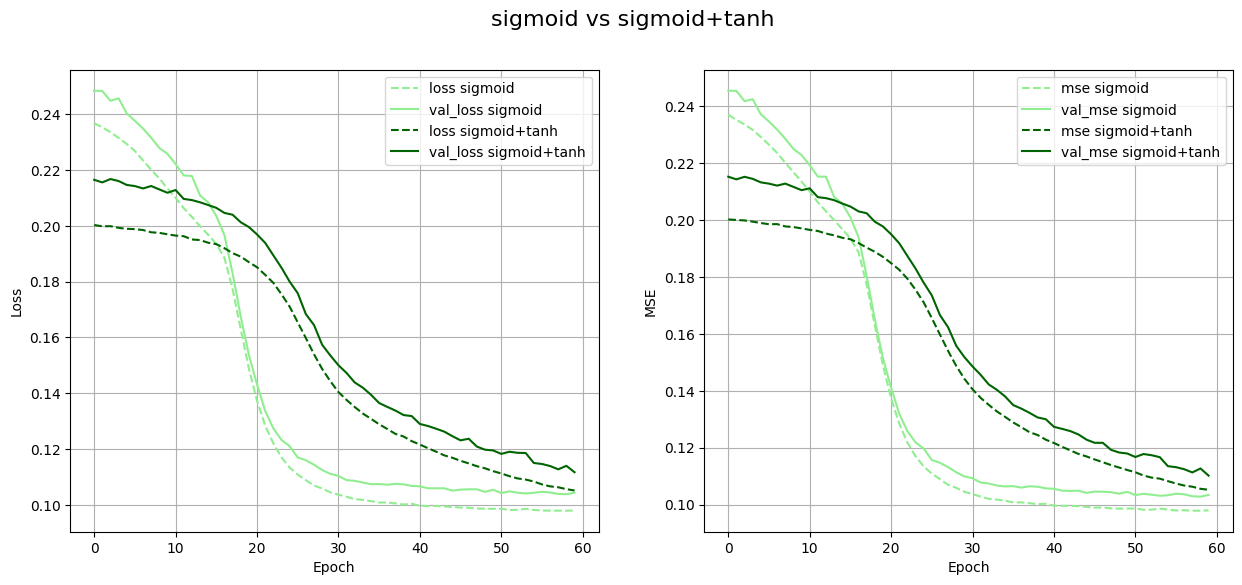

In [15]:
# plot results sigmoid
# for relu we will use relu + linear
fig = plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.plot(historysigmoid.history['loss'], label = 'loss sigmoid', color = 'lightgreen', linestyle = '--')
plt.plot(historysigmoid.history['val_loss'], label = 'val_loss sigmoid', color = 'lightgreen')
plt.plot(historysigmoid_tan.history['loss'], label = 'loss sigmoid+tanh', color = 'darkgreen', linestyle = '--')
plt.plot(historysigmoid_tan.history['val_loss'], label = 'val_loss sigmoid+tanh', color = 'darkgreen')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(historysigmoid.history['mse'], label = 'mse sigmoid', color = 'lightgreen', linestyle = '--')
plt.plot(historysigmoid.history['val_mse'], label = 'val_mse sigmoid', color = 'lightgreen')
plt.plot(historysigmoid_tan.history['mse'], label = 'mse sigmoid+tanh', color = 'darkgreen', linestyle = '--')
plt.plot(historysigmoid_tan.history['val_mse'], label = 'val_mse sigmoid+tanh', color = 'darkgreen')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

plt.suptitle('sigmoid vs sigmoid+tanh', fontsize = 16)
plt.show()

By comparing the results of the implementations with the linear and tanh activation functions in the last layer, we can see that both for the relu and sigmoid activation functions, the model with the linear activation function in the last layer yields better results.
We will then use the model with the linear activation function in the last layer to evaluate the performance of the model with the tanh activation function in the hidden layers.

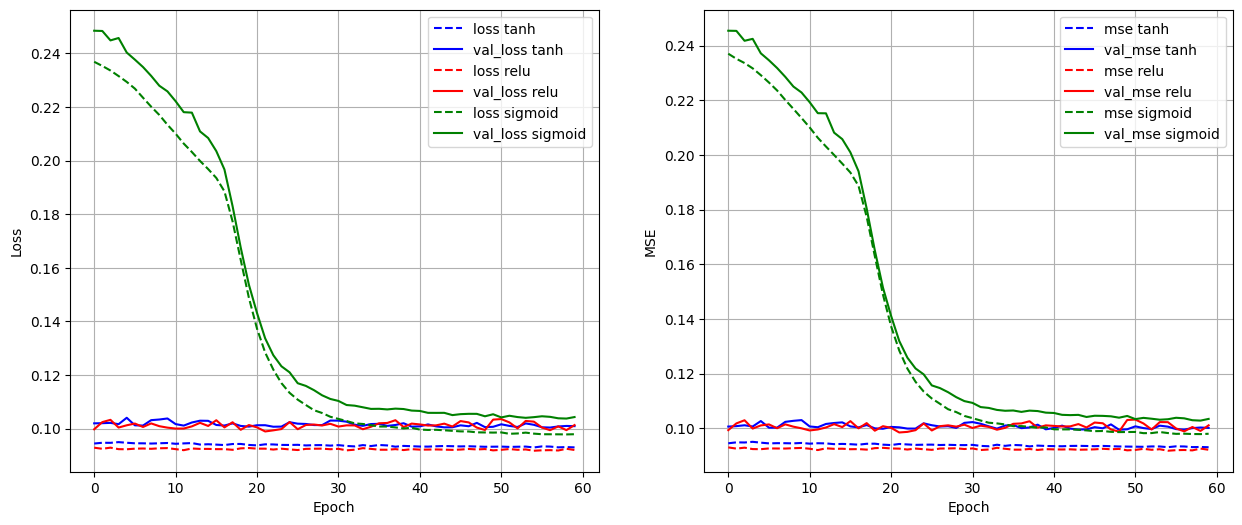

In [18]:
# print the results
fig = plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.plot(historytanh_lin.history['loss'], label = 'loss tanh', color = 'blue', linestyle = '--')
plt.plot(historytanh_lin.history['val_loss'], label = 'val_loss tanh', color = 'blue')
plt.plot(historyrelu.history['loss'], label = 'loss relu', color = 'red', linestyle = '--')
plt.plot(historyrelu.history['val_loss'], label = 'val_loss relu', color = 'red')
plt.plot(historysigmoid.history['loss'], label = 'loss sigmoid', color = 'green', linestyle = '--')
plt.plot(historysigmoid.history['val_loss'], label = 'val_loss sigmoid', color = 'green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(historytanh_lin.history['mse'], label = 'mse tanh', color = 'blue', linestyle = '--')
plt.plot(historytanh_lin.history['val_mse'], label = 'val_mse tanh', color = 'blue')
plt.plot(historyrelu.history['mse'], label = 'mse relu', color = 'red', linestyle = '--')
plt.plot(historyrelu.history['val_mse'], label = 'val_mse relu', color = 'red')
plt.plot(historysigmoid.history['mse'], label = 'mse sigmoid', color = 'green', linestyle = '--')
plt.plot(historysigmoid.history['val_mse'], label = 'val_mse sigmoid', color = 'green')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

plt.show()



In [22]:
# print accuracy on validation data
scoretanh = modeltanh.evaluate(pair_valid, z_valid, batch_size=32, verbose=1)
scoretanh_lin = modeltanh_lin.evaluate(pair_valid, z_valid, batch_size=32, verbose=1)
scorerelu = modelrelu.evaluate(pair_valid, z_valid, batch_size=32, verbose=1)
scoretanh_tan = modelrelu_tan.evaluate(pair_valid, z_valid, batch_size=32, verbose=1)
scoresigmoid = modelsigmoid.evaluate(pair_valid, z_valid, batch_size=32, verbose=1)
scoresigmoid_tan = modelsigmoid_tan.evaluate(pair_valid, z_valid, batch_size=32, verbose=1)

print("Tanh:")
print('Test loss:', scoretanh[0])
print('Test accuracy:', scoretanh[1])
print("Tanh+lin:")
print('Test loss:', scoretanh_lin[0])
print('Test accuracy:', scoretanh_lin[1])
print("Relu+lin:")
print('Test loss:', scorerelu[0])
print('Test accuracy:', scorerelu[1])
print("Relu+tanh:")
print('Test loss:', scoretanh_tan[0])
print('Test accuracy:', scoretanh_tan[1])
print("Sigmoid+lin:")
print('Test loss:', scoresigmoid[0])
print('Test accuracy:', scoresigmoid[1])
print("Sigmoid+tanh:")
print('Test loss:', scoresigmoid_tan[0])
print('Test accuracy:', scoresigmoid_tan[1])



32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 0.1058 - mse: 0.1057
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1054 - mse: 0.1054 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 0.1092 - mse: 0.1092
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 0.1071 - mse: 0.1070
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 0.1090 - mse: 0.1089
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - loss: 0.1148 - mse: 0.1147
Tanh:
Test loss: 0.10115516930818558
Test accuracy: 0.10021783411502838
Tanh+lin:
Test loss: 0.10095428675413132
Test accuracy: 0.10008034855127335
Relu+lin:
Test loss: 0.10134972631931305
Test accuracy: 0.10103247314691544
Relu+tanh:
Test loss: 0.10172626376152039
Test accuracy: 0.10066325217485428
Sigmoid+lin:
Test loss: 0.1043403372168541
Test accuracy: 0.10338144749403
Sigmoid+tanh:
Test loss: 0.11167070269584656
Test accuracy: 0.11014218628406525


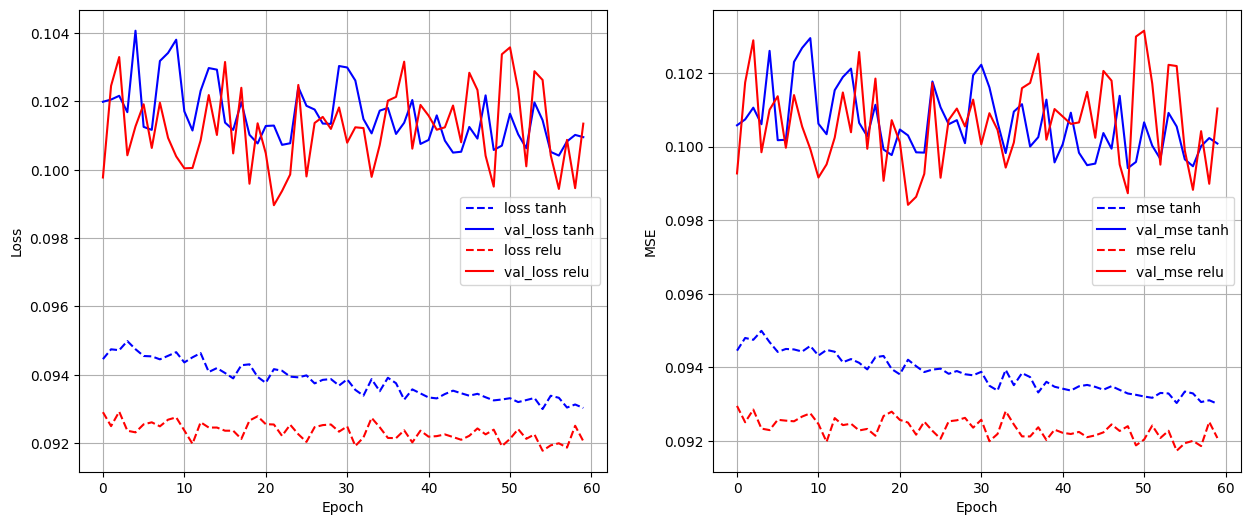

In [19]:
# print the results
fig = plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.plot(historytanh_lin.history['loss'], label = 'loss tanh', color = 'blue', linestyle = '--')
plt.plot(historytanh_lin.history['val_loss'], label = 'val_loss tanh', color = 'blue')
plt.plot(historyrelu.history['loss'], label = 'loss relu', color = 'red', linestyle = '--')
plt.plot(historyrelu.history['val_loss'], label = 'val_loss relu', color = 'red')
# plt.plot(historysigmoid.history['loss'], label = 'loss sigmoid', color = 'green', linestyle = '--')
# plt.plot(historysigmoid.history['val_loss'], label = 'val_loss sigmoid', color = 'green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(historytanh_lin.history['mse'], label = 'mse tanh', color = 'blue', linestyle = '--')
plt.plot(historytanh_lin.history['val_mse'], label = 'val_mse tanh', color = 'blue')
plt.plot(historyrelu.history['mse'], label = 'mse relu', color = 'red', linestyle = '--')
plt.plot(historyrelu.history['val_mse'], label = 'val_mse relu', color = 'red')
# plt.plot(historysigmoid.history['mse'], label = 'mse sigmoid', color = 'green', linestyle = '--')
# plt.plot(historysigmoid.history['val_mse'], label = 'val_mse sigmoid', color = 'green')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


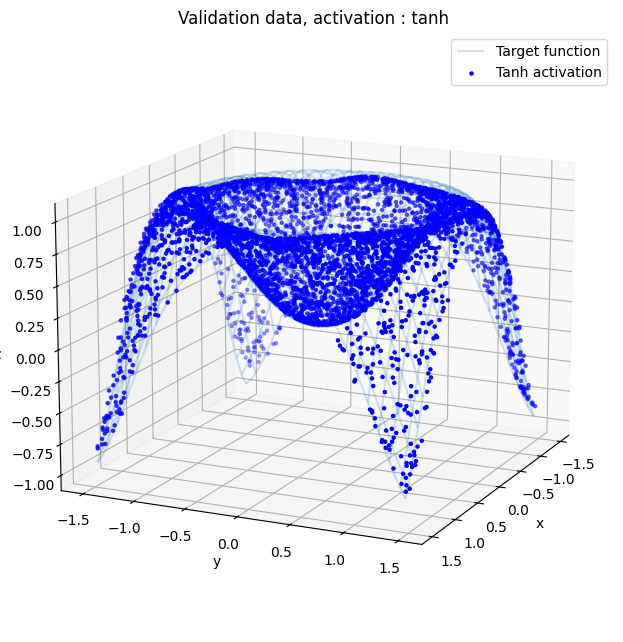

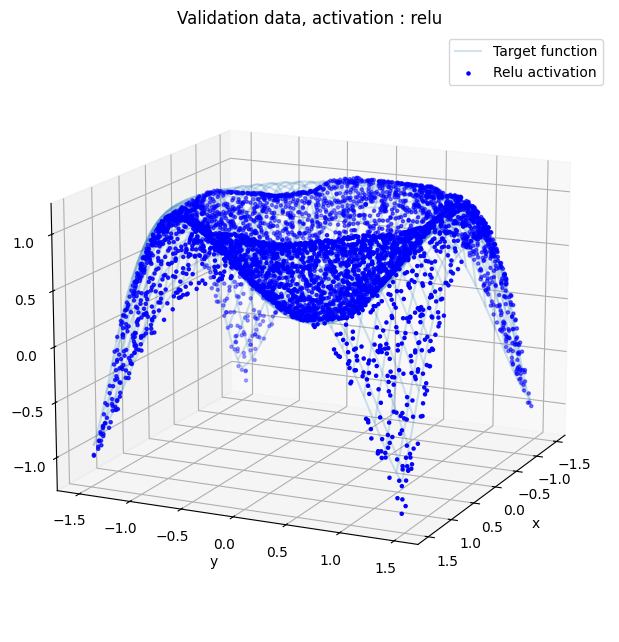

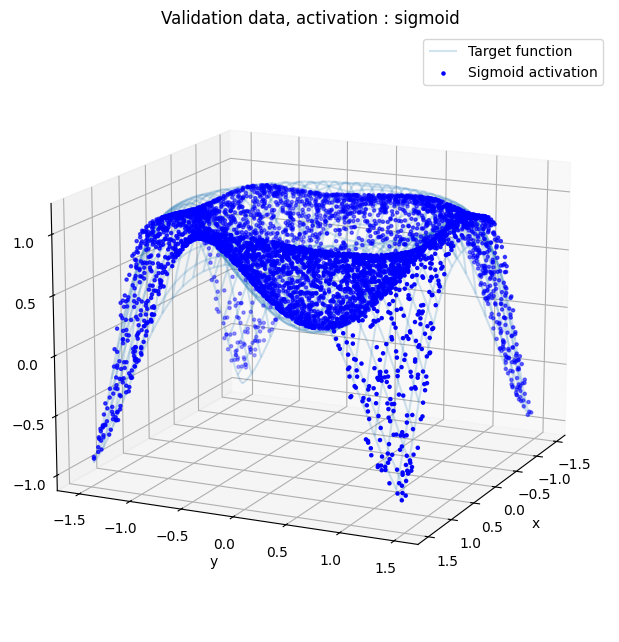

In [20]:
x_predicted = np.random.uniform(-3./2, 3./2, 5000) 
y_predicted = np.random.uniform(-3./2, 3./2, 5000) 
pair_predicted = np.column_stack((x_predicted, y_predicted))
z_tanh = modeltanh_lin.predict(pair_predicted)
z_relu = modelrelu.predict(pair_predicted)
z_sigmoid = modelsigmoid.predict(pair_predicted)
fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig)
fig.add_axes(ax)
ax.plot_wireframe(  X_surf, Y_surf, f(X_surf,Y_surf), 
                    label = 'Target function',
                    alpha = 0.2)
ax.scatter(x_predicted, y_predicted, z_tanh, marker = ".", color = "b", label = 'Tanh activation')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Validation data, activation : tanh")
ax.legend()
ax.view_init(15, 25)
plt.show()

fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig)
fig.add_axes(ax)
ax.plot_wireframe(  X_surf, Y_surf, f(X_surf,Y_surf), 
                    label = 'Target function',
                    alpha = 0.2)
ax.scatter(x_predicted, y_predicted, z_relu, marker = ".", color = "b", label = 'Relu activation')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Validation data, activation : relu")
ax.legend()
ax.view_init(15, 25)
plt.show()

fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig)
fig.add_axes(ax)
ax.plot_wireframe(  X_surf, Y_surf, f(X_surf,Y_surf), 
                    label = 'Target function',
                    alpha = 0.2)
ax.scatter(x_predicted, y_predicted, z_sigmoid, marker = ".", color = "b", label = 'Sigmoid activation')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Validation data, activation : sigmoid")
ax.legend()
ax.view_init(15, 25)
plt.show()


## Some observations
All three models performs well, but the model with the tanh activation function in the hidden layers and the linear activation function in the last layer is the one that performs the best.
The linear activation function in the last layer is the one that gives the best results. This could be due to the fact that the linear activation function has less aggressive behavior than the tanh activation function.
